In [19]:
import warnings
warnings.filterwarnings("ignore")

# loading packages
# basic + dates 
import numpy as np
import pandas as pd
from pandas import datetime

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
%matplotlib inline

# statistics
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# prophet by Facebook
from fbprophet import Prophet

In [20]:
#train = pd.read_csv(r"/Users/y0p00uk/Documents/WMT.csv")

In [21]:
train = pd.read_csv(r"/Users/y0p00uk/Documents/filter.csv")

In [22]:
train.head()

,Date,Weekly_Sales
0,2/5/10,24924.50
1,2/12/10,46039.49
2,2/19/10,41595.55
3,2/26/10,19403.54
4,3/5/10,21827.90


In [23]:
train.columns

Index(['Date', 'Weekly_Sales'], dtype='object')

In [24]:
train['ds']=train['Date']
train['y'] = train['Weekly_Sales']

In [25]:
df=train[['ds','y']]

In [26]:
df.head()

,ds,y
0,2/5/10,24924.50
1,2/12/10,46039.49
2,2/19/10,41595.55
3,2/26/10,19403.54
4,3/5/10,21827.90


In [27]:
m=Prophet()
m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [28]:
future=m.make_future_dataframe(periods=365)
future.tail()

,ds
503,2013-10-22
504,2013-10-23
505,2013-10-24
506,2013-10-25
507,2013-10-26


In [29]:
forecast=m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
503,2013-10-22,29399.908907,22151.742483,37065.465225
504,2013-10-23,30209.196533,23300.482521,37694.901143
505,2013-10-24,30972.836447,23921.873316,38218.241751
506,2013-10-25,31674.363306,24173.953066,38858.649416
507,2013-10-26,32297.805279,24384.318266,39945.174887


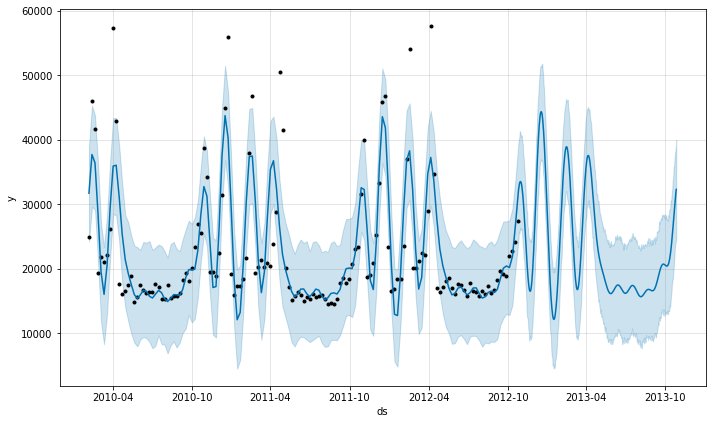

In [30]:
fgil=m.plot(forecast)

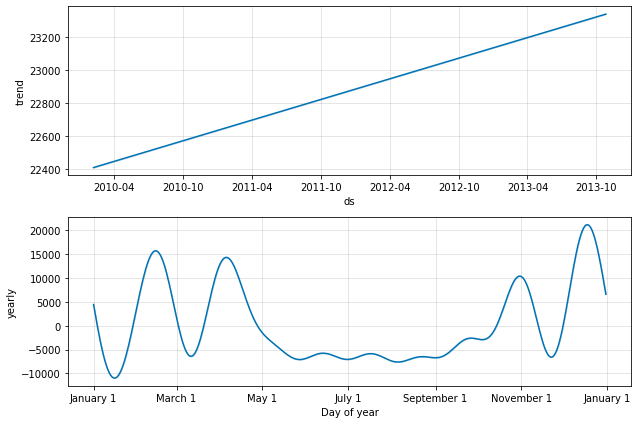

In [31]:
fig2=m.plot_components(forecast)

In [32]:
forecast['yhat']

0      31700.436915
1      37706.421716
2      36409.210634
3      28515.884704
4      19511.612887
           ...     
503    29399.908907
504    30209.196533
505    30972.836447
506    31674.363306
507    32297.805279
Name: yhat, Length: 508, dtype: float64

In [33]:
from fbprophet.plot import plot_plotly, plot_components_plotly



In [34]:
df['SMAPE_ERR']=(abs(forecast['yhat']-df['y'])/((abs(forecast['yhat']) + abs(df['y']))/2))*100
df['forecast'] = forecast['yhat']
df

,ds,y,SMAPE_ERR,forecast
0,2/5/10,24924.50,23.932696,31700.436915
1,2/12/10,46039.49,19.900836,37706.421716
2,2/19/10,41595.55,13.297494,36409.210634
3,2/26/10,19403.54,38.031945,28515.884704
4,3/5/10,21827.90,11.206165,19511.612887
...,...,...,...,...
138,9/28/12,18947.81,7.511797,20426.675657
139,10/5/12,21904.47,8.179269,20183.236623
140,10/12/12,22764.01,3.821320,21910.433384
141,10/19/12,24185.27,10.340914,26822.610514


In [35]:
df['SMAPE_ERR'].mean()

13.938222217801277